<h2><center><font size='6'>Titanic - machine learning from disaster</font></center></h2>

Table Of Contents  
=

1. <a href='#Link-SecIntro'>Introduction</a>  
2. <a href='#Link-SecDataPrep'>Data preparation</a>  
3. <a href='#Link-SecDataExpl'>Data exploration</a>
 - <a href='#Link-SecDataExpl-Summary'>Data summary</a>
 - <a href='#Link-SecDataExpl-GenAss'>General assesment of feature associations</a>
4. <a href='#Link-SecImp'>Data imputation</a>
 - <a href='#Link-SecImp-Emb'>Embarked feature</a>
 - <a href='#Link-SecImp-Cabin'>Cabin feature</a>
 - <a href='#Link-SecImp-Age'>Age feature</a>
 - <a href='#Link-SecImp-Fare'>Fare feature</a>
5. <a href='#Link-SecModel'>Model training, selection, and predictions</a>
 - <a href='#Link-SecModel-DataPrepr'>Data preprocessing</a>
 - <a href='#Link-SecModel-Training'>Model training</a>\
  a) <a href='#Link-SecModel-Training-RFC'>Random forest classifier</a>\
  b) <a href='#Link-SecModel-Training-XGBC'>Gradient boosting classifier</a>\
  c) <a href='#Link-SecModel-Training-LRC'>Logistic regression classifier</a>\
  d) <a href='#Link-SecModel-Training-KNNC'>k-nearest neighbors classifier</a>
 - <a href='#Link-SecModel-Selection'>Model selection and predictions</a> 

# <a id='Link-SecIntro'>Introduction</a>  

In this notebook we will explore and analyze the famous Titanic Dataset using Python libraries such as `pandas`, `matplotlib`, `seaborn`, and `dython`. After that, we will prepare the dataset for model training, consider four different ML models from the popular `sklearn` and `xgboost` libraries, and then assess the accuracy of each model using the cross validation data. Ultimately, we will choose the best ML model, apply it the test dataset to predict which passengers of Titanic survived.

# <a id='Link-SecDataPrep'>Data preparation</a>  

In [1]:
#Install/load required packages
!pip install dython

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
#Upload and record data 
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path, index_col="PassengerId")
test_data = pd.read_csv(test_file_path, index_col="PassengerId")

# <a id='Link-SecDataExpl'>Data exploration</a>  

## <a id='Link-SecDataExpl-Summary'>Data summary</a>

In [3]:
#Visualize the first entries of the dataset
train_data.head()
#test_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Brief summary
train_data.describe()
#test_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Identify missing entries
train_data.isnull().sum()
#test_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## <a id='Link-SecDataExpl-GenAss'>General assesment of feature associations</a>

First, let's peform a general assesment of assosiation (correlation) between different features.

Since our dataset contains both numerical and categotical types of features, we will need to analyze 3 different types of association/correlation: a) categorical-categorical association, b) categorical-numerical association, c) numerical-numerical correlation. To estimate the corresponding associations, we will use the [dython](http://shakedzy.xyz/dython/) library (see [this link](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [this kaggle notebook](https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival) for more details about this library), which evaluates the following measures:

* The _categorical-categorical_ feature association (e.g. 'Sex'-'Survived') is computed using the _Theil's U_ measure.
* The _numerical-categorical_ feature association (e.g. 'Fare'-'Survived') is computed using the _correlation ratio_ measure called Eta. 
* The _numerical-numerical_ correlation (e.g. 'Fare'-'Age') is computed using the _Pearson's R_ measure.
<a id='Fig1Link'></a>

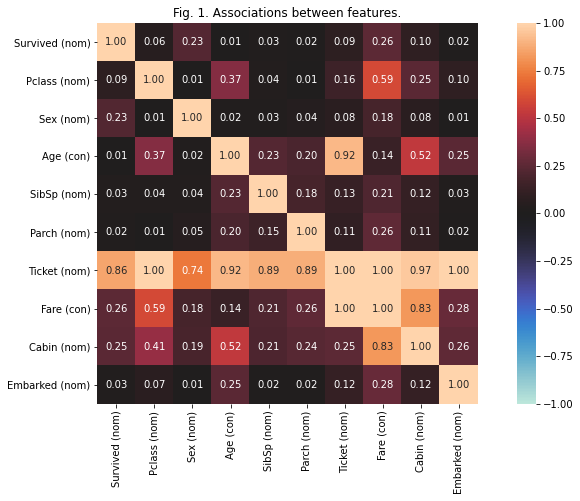

In [6]:
from dython.nominal import associations

categorical_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 
                    'Parch', 'Ticket', 'Cabin', 'Embarked']

fig1 = associations(train_data.drop(['Name'],axis=1), figsize=(14,7),
                    theil_u=True, nominal_columns=categorical_cols,
                    title='Fig. 1. Associations between features.',
                    mark_columns=True);

We are interested in the output of the first column that shows assotiations between the survival rate and the rest of the features. There are several interesting observations that can be made:
1. There is a very strong association between the 'Ticket' and 'Survived' columns.   
2. The association between the 'Age' and 'Survived' features is surprisingly low (only 0.01). This needs to be checked.  
3. The association between the 'Pclass' and 'Survived' seem to be quite low, too. On the other hand, the association between the 'Fare' and 'Survived' columns is much stronger. This needs to be understood.


**1. The 'Ticket'-'Survived' association.**

As it is shown below, the reason for such a high association (0.86) is due to 681 unique entries (out of 891) in the 'Ticket' column, resulting in a strong association between these columns. Most passengers had unique ticket numbers, therefore knowledge of their ticket number uniquely determines their survival.  

In [7]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCormack, Mr. Thomas Joseph",male,CA. 2343,G6,S
freq,1,577,7,4,644


**2. The 'Age'-'Survived' association.**

Let's take a closer look at passengers age data and check if the evaluated 0.01 association (displayed in [Fig. 1](#Fig1Link)) with the survaval rate makes sense. In order to visualize the survival vs age data, we define 6 age groups: 0-14, 14-28, ..., 70-84. (Check out [this turotial](https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps) to learn more about data visualization with python.) 

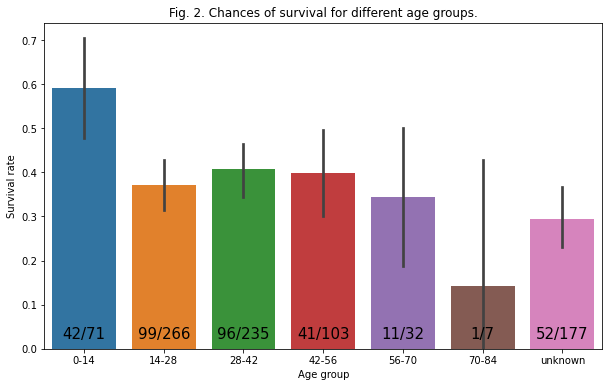

In [8]:
#Create a copy of the train dataset and create 6 age groups
train_data_age_groups = train_data.copy()
train_data_age_groups['Age'] = train_data_age_groups['Age']//14
train_data_age_groups.fillna('unknown',inplace=True)

#Create suplemental lists for the data visualization purposes
order_list_fig2 = [0, 1, 2, 3, 4, 5, 'unknown']
bar_counts_fig2 = [x for x in train_data_age_groups.Age.value_counts()[order_list_fig2]]

#Visualize results
plt.figure(figsize=(10,6))
plt.title('Fig. 2. Chances of survival for different age groups.')
fig2 = sns.barplot(x="Age", y="Survived", data=train_data_age_groups, 
                   order=order_list_fig2)
plt.xlabel('Age group')
plt.ylabel('Survival rate');
fig2.set_xticklabels(['0-14', '14-28', '28-42', '42-56', 
                      '56-70', '70-84', 'unknown']);

#Add value counts at the bar bottom
for i, patch in enumerate(fig2.patches):
    fig2.annotate(f'{patch.get_height()*bar_counts_fig2[i]:.0f}/{bar_counts_fig2[i]}', 
                  (patch.get_x() + patch.get_width() / 2., 0), 
                  ha = 'center', va = 'center', 
                  size=15, xytext = (0, 15), 
                  textcoords = 'offset points')

One can see that there seem to be some association between the survival rate and age groups. More specifically: 
* Children (0-14) are more likely to survive than other age groups. 
* Seniors (70-84) seem to have the smallest survival chances. Though, due to limited statistics, elderly's survival rate has large uncertainties. 
* Various adult age groups have very similar chances for survival. 

These results seem to contradict with the association coefficient (0.01) between the 'Age' and 'Survival' columns displayed in [Fig. 1](#Fig1Link). This is because the associations method of the dython.nominal module by default replaces all the 'NaN' values in the 'Age' column with 0. As a result, all the 'NaN' age values were prescribed to the 0-14 age group, thereby lovering the survival chances for children. If we now remove all the 'NaN' values in the 'Age' column, the association coefficient should increase. The visualisation below confirm this assumption.

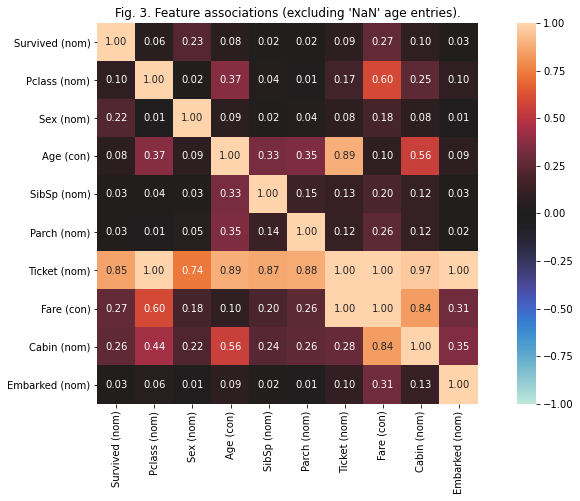

In [9]:
#Drop rows with NaN values in the 'Age' column 
train_data_no_nan_age = train_data.dropna(subset=['Age'])

#Produce an updated associations table
categorical_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 
                    'Parch', 'Ticket', 'Cabin', 'Embarked']
fig3 = associations(train_data_no_nan_age.drop(['Name'],axis=1), figsize=(14,7), 
             theil_u=True, nominal_columns=categorical_cols,
             title='Fig. 3. Feature associations (excluding \'NaN\' age entries).',
             mark_columns=True);

**3. The 'Pclass'-'Survived' association.**

Let's take a closer look at the 'Pclass' column and check if the corresponding association with the 'Survival' column makes sense. 

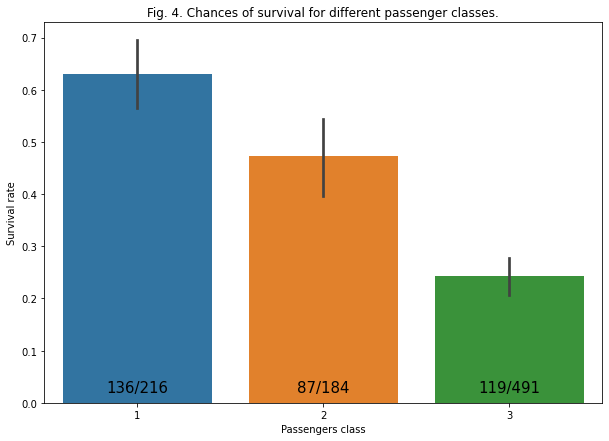

In [10]:
#Create suplemental lists for data visualization purposes
order_list_fig4 = [1, 2, 3]
bar_counts_fig4 = [x for x in train_data.Pclass.value_counts()[order_list_fig4]]

#Visualize results
plt.figure(figsize=(10,7))
plt.title('Fig. 4. Chances of survival for different passenger classes.')
fig4 = sns.barplot(data=train_data, x='Pclass', y='Survived',
                   order=order_list_fig4)
plt.ylabel('Survival rate')
plt.xlabel('Passengers class');

for i, patch in enumerate(fig4.patches):
    fig4.annotate(f'{patch.get_height()*bar_counts_fig4[i]:.0f}/{bar_counts_fig4[i]}', 
                  (patch.get_x() + patch.get_width() / 2., 0), 
                  ha = 'center', va = 'center', 
                  size=15, xytext = (0, 15), 
                  textcoords = 'offset points')

The association seem to be quite strong. The possible reason why the association coefficient in Fig. 4 is low is because we treat the pessenger class as a nominal categorical column. In fact, 'Pclass' is an ordinal column. It might be better to treat this column as numerical, so that the Eta correlation ratio is evaluated instead of the Thiel's U measure. Below, we can see that, indeed, the corresponding association coefficient increases when we treat the 'Pclass' column as numerical. The same observation can be made for the 'SibSp' and 'Parch' columns.

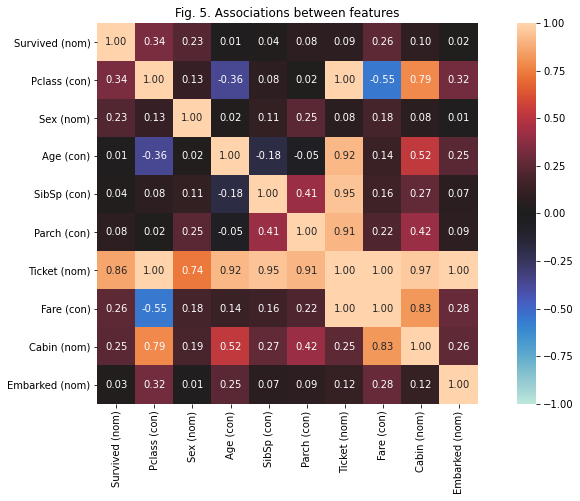

In [11]:
# Produce an associations table
categorical_cols = ['Survived', 'Sex','Ticket', 'Cabin', 'Embarked']
fig5 = associations(train_data.drop(['Name'],axis=1), figsize=(14,7), 
             theil_u=True, nominal_columns=categorical_cols,
             title='Fig. 5. Associations between features',
             mark_columns=True);

# <a id='Link-SecImp'>Data imputation</a>

## <a id='Link-SecImp-Emb'>Embarked feature</a>

We will start with imputing the 'Embarked' column.

First, we visualize the corresponding data and notice that there are only 2 'NaN' values in the 'Embarked' column.

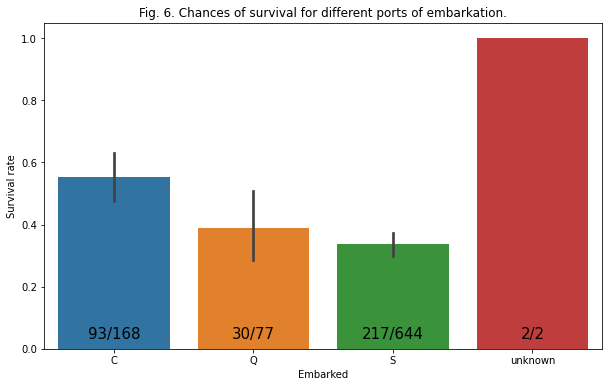

In [12]:
#Create a copy of the train dataset 
train_data_emb = train_data.copy()
train_data_emb.fillna('unknown',inplace=True)

#Create suplemental lists for the data visualization purposes
order_list_fig6 = ['C', 'Q', 'S', 'unknown']
bar_counts_fig6 = [x for x in train_data_emb.Embarked.value_counts()[order_list_fig6]]

#Visualize data
plt.figure(figsize=(10,6))
plt.title('Fig. 6. Chances of survival for different ports of embarkation.')
fig6 = sns.barplot(data=train_data_emb, x='Embarked', y='Survived', 
                   order=order_list_fig6)
plt.ylabel('Survival rate')

for i, patch in enumerate(fig6.patches):
    fig6.annotate(f'{patch.get_height()*bar_counts_fig6[i]:.0f}/{bar_counts_fig6[i]}', 
                  (patch.get_x() + patch.get_width()/2., 0), 
                  ha = 'center', va = 'center', 
                  size=15, xytext = (0, 15), 
                  textcoords = 'offset points')

Below, we take a closer look at the entries with the 'NaN' value in the 'Embarked' column. We notice that both passengers had 1st class tickets, were lodged in zone B, and payed 80 for their tickets.

In [13]:
train_data[train_data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let us now investigate the ticket price distribution for all 1st class passengers lodged in zone B.

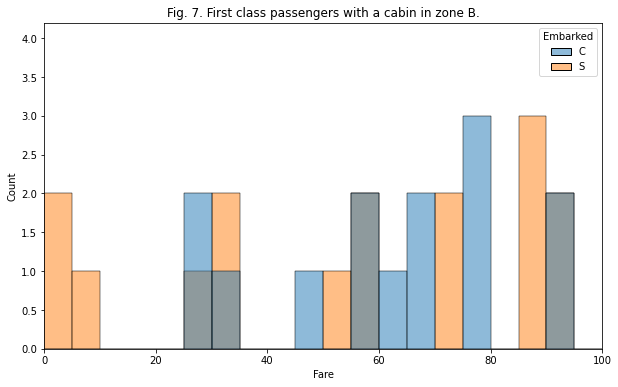

In [14]:
#Select appropriate rows
first_class_cabB = train_data[(train_data.Pclass == 1) & 
                              (train_data['Cabin'].str.contains('B'))]

#Visualize the distribution of 'Fare' for zone B
plt.figure(figsize=(10, 6))
plt.title('Fig. 7. First class passengers with a cabin in zone B.')
fig7 = sns.histplot(data=first_class_cabB, x='Fare', hue='Embarked', 
                    kde=False, binwidth=5)
plt.xlim([0,100]);

Among the 1st class passengers in the zone B who payed between 60 and 80 for their tickets, 6 embarked in 'C', while only 2 embarked in 'S'. We conclude that most likely the two passengers of our interest belonged to the 'Embarked' == 'C' category. To check this assumption further, we study the ticket price distribution for the 1st class passengers embarked in 'C' and 'S', independently of their lodging zone.

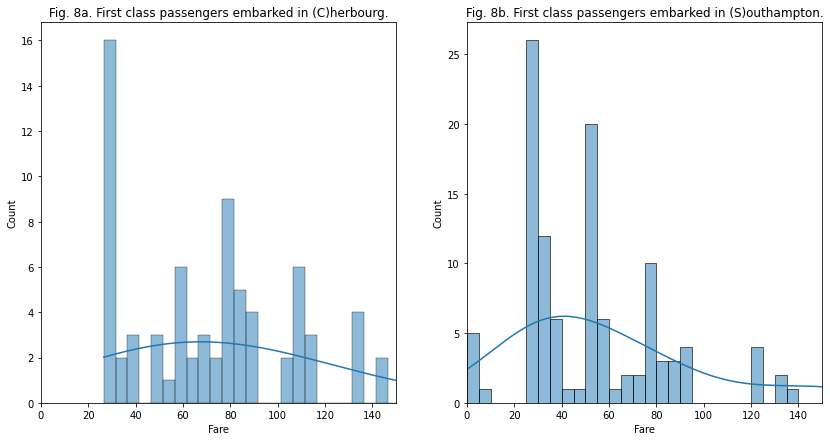

In [15]:
#1st class passengers emparked in Southampton 
first_class_embS = train_data[(train_data.Pclass == 1) &
                              (train_data.Embarked.str.contains('S'))]

#1st class passengers emparked in Cherbourg
first_class_embC = train_data[(train_data.Pclass == 1) & 
                              (train_data.Embarked.str.contains('C'))]

fig, axes = plt.subplots(1, 2, figsize=(14,7))

fig8a = sns.histplot(x=first_class_embC.Fare, ax=axes[0], kde=True, binwidth=5)
axes[0].set_xlim([0,150])
axes[0].set_title('Fig. 8a. First class passengers embarked in (C)herbourg.')

fig8b = sns.histplot(x=first_class_embS['Fare'], ax=axes[1], kde=True, binwidth=5)
axes[1].set_xlim([0,150])
axes[1].set_title('Fig. 8b. First class passengers embarked in (S)outhampton.');

These plots don't bring a definitive answer for passengers who payed ~80 for their tickets, so we stick to our previous conclusion and impute the corresponding 'NaN' values with 'C'.

In [16]:
train_data_imputed = train_data.copy() 
train_data_imputed.Embarked.fillna('C',inplace=True)
#train_data_imputed.isnull().sum()

## <a id='Link-SecImp-Cabin'>Cabin feature</a>

In [Section 3.1](#Link-SecDataExpl-Examine), we observed that the number of 'NaN' entries in the 'Cabin' column of the training dataset is huge (~77%). The initial guess would be to drop entirely this column from our analysis. However, the code below suggests that the chances of survival for a person with a 'NaN' value in the 'Cabin' column are considerably lower than those for a person with a known cabin.

In [17]:
num_surv_cab_notnull = len(train_data[(train_data.Cabin.notnull()) & 
                                      (train_data.Survived == 1)])
num_died_cab_notnull = len(train_data[(train_data.Cabin.notnull()) & 
                                      (train_data.Survived == 0)])
tot_cab_notnull = num_surv_cab_notnull + num_died_cab_notnull
print('Probability to survive with known cabin is ' 
      f'{num_surv_cab_notnull/tot_cab_notnull*100:.1f}%!')

num_surv_cab_null = len(train_data[(train_data.Cabin.isnull()) & 
                                   (train_data.Survived == 1)])
num_died_cab_null = len(train_data[(train_data.Cabin.isnull()) & 
                                   (train_data.Survived == 0)])
tot_cab_null = num_surv_cab_null + num_died_cab_null
print('Probability to survive with unknown cabin is only ' 
      f'{num_surv_cab_null/tot_cab_null*100:.1f}%.')

Probability to survive with known cabin is 66.7%!
Probability to survive with unknown cabin is only 30.0%.


In the same time, the average survival rate in the training dataset, as visualized below, is 38.4%.

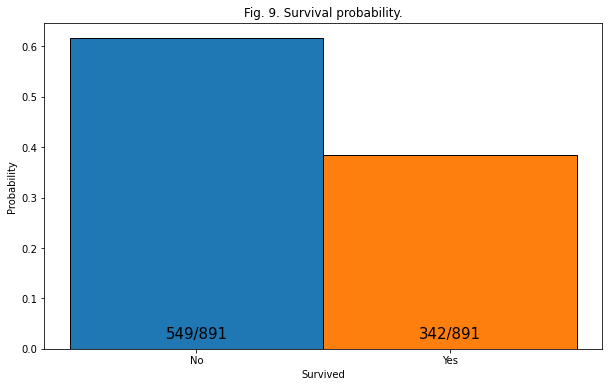

In [18]:
#Create a copy of the train dataset to rename survival groups for the data visualization purposes
train_data_survival = train_data.copy()
train_data_survival['Survived'].replace(0, 'No',inplace=True) 
train_data_survival['Survived'].replace(1, 'Yes',inplace=True)

#Create suplemental lists for the data visualization purposes
colors=['C0','C1']
bar_counts_fig9 = [x for x in train_data_survival.Survived.value_counts()]

#Visualize the survival data 
plt.figure(figsize=(10, 6))
plt.title('Fig. 9. Survival probability.')
fig9 = sns.histplot(train_data_survival,  x='Survived', stat='probability')
for i, patch in enumerate(fig9.patches):
    patch.set_facecolor(colors[i])
    fig9.annotate(f'{bar_counts_fig9[i]:.0f}/{sum(bar_counts_fig9)}', 
                  (patch.get_x() + patch.get_width() / 2., 0), 
                  ha = 'center', va = 'center', 
                  size=15, xytext = (0, 15), 
                  textcoords = 'offset points')

Given this, we decide to mark the 'NaN' cabin values (in training and testing datasets) as 'unknown' and this marking should help our model to lower the survival chances for entries with the 'NaN' values in the 'Cabin' column.

In [19]:
test_data_imputed = test_data.copy()
test_data_imputed.Cabin.fillna('unknown', inplace=True)

train_data_imputed.Cabin.fillna('unknown', inplace=True)
train_data_imputed.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

## <a id='Link-SecImp-Age'>Age feature</a>

Now, we will proceed to impute the missing values in the 'Age' column.

First, we check below if passengers with 'NaN' values in the 'Age' column had different survival chances than those with known age.

In [20]:
num_surv_age_notnull = len(train_data[(train_data.Age.notnull()) & 
                                      (train_data.Survived == 1)])
num_died_age_notnull = len(train_data[(train_data.Age.notnull()) & 
                                      (train_data.Survived == 0)])
tot_age_notnull = num_surv_age_notnull + num_died_age_notnull
print('Probability to survive with known age is '
      f'{num_surv_age_notnull/tot_age_notnull*100:.1f}%')

num_surv_age_null = len(train_data[(train_data.Age.isnull()) & 
                                   (train_data.Survived == 1)])
num_died_age_null = len(train_data[(train_data.Age.isnull()) & 
                                   (train_data.Survived == 0)])
tot_age_null = num_surv_age_null + num_died_age_null
print('Probability to survive with unknown age is '
      f'{num_surv_age_null/tot_age_null*100:.1f}%')

Probability to survive with known age is 40.6%
Probability to survive with unknown age is 29.4%


This means that there is a slight association between known (unknown) age and survival rate. Therefore, before imputing the unknown ages with numerical values, we will add an extra (boolean) column indicating that the age was missing, as discussed in one of the [Intermediate Machine Learning courses](https://www.kaggle.com/alexisbcook/missing-values). There is a chance that this extra column may improve the accuracy of our model. Below, we will work with training and test data because both contain 'NaN' age values.

In [21]:
#Separate the 'Survived' column from the training dataset
y_train = train_data['Survived']
X_train_imputed = train_data_imputed.drop(['Survived'], axis=1)

#Rename the test dataset correspondingly
X_test_imputed = test_data_imputed

#Concat training and test data to have more statistics for 'Age' 
X_all = pd.concat([X_train_imputed, X_test_imputed])

#Add a boolean column indicating if the age was missing 
X_all['Age_was_missing'] = X_all['Age'].isnull()

#Check out the tail of the combined dataset
X_all.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,unknown,S,True
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S,False
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,unknown,S,True
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,unknown,C,True


Before imputing the 'NaN' entries in the 'Age' column, we will analyze below the people's titles provided in the 'Name' column. As a result of this, one can clearly see that the passengers with the 'NaN' age belonged to 4 relevant age groups (with only one exception). These age groups are: 
* Boys (title 'Master.')
* Married Women (title 'Mrs.')
* Single Women (title 'Miss.')
* Men (title 'Mr.')

We will impute the corresponding 'NaN' values depending on the person's age group.

In [22]:
# Check out the unique titles in the combined dataset
X_all.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Sir           1
Don           1
Capt          1
Jonkheer      1
Dona          1
Mme           1
Countess      1
Lady          1
Name: Name, dtype: int64

In [23]:
# Check out the unique titles for the 'NaN' age entries in the combined dataset 
X_all[X_all['Age_was_missing']==True].Name.str.extract(' ([A-Za-z]+)\.', 
                                                       expand=False).value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Ms          1
Dr          1
Name: Name, dtype: int64

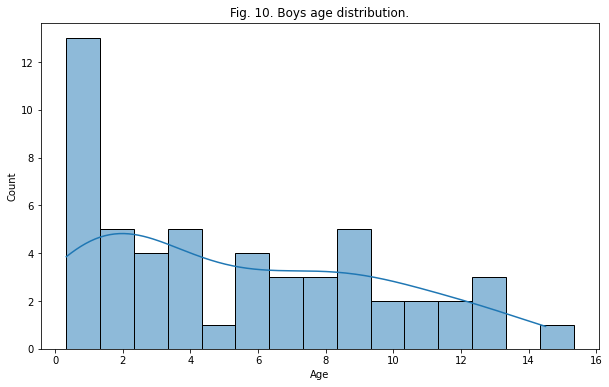

In [24]:
#Generate the 'boys_data' table and record relevant statistical info
boys_data = X_all[X_all['Name'].str.split(",").str.get(1).str.contains('Master.')]
boys_mean_age = boys_data.Age.mean()
boys_age_std = boys_data.Age.std()
boys_nan_count = boys_data.Age.isnull().sum()

#Visualize the distribution of boys age 
plt.figure(figsize=(10,6))
sns.histplot(boys_data, x='Age', kde=True, binwidth=1)
plt.title('Fig. 10. Boys age distribution.');

In [25]:
#Get indices of the 'NaN' age values for boys
boys_age_nan_ind = X_all[(X_all['Name'].str.split(",").str.get(1).str.contains('Master.'))
                         & (X_all['Age'].isnull())].index

#Impute the boys 'NaN' age
X_all.loc[boys_age_nan_ind,'Age'] = boys_mean_age
print('Number of entries that are left with an unknown age is:',
      len(X_all[X_all['Age'].isnull()]))
X_all.loc[boys_age_nan_ind]

Number of entries that are left with an unknown age is: 255


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
66,3,"Moubarek, Master. Gerios",male,5.482642,1,1,2661,15.2458,unknown,C,True
160,3,"Sage, Master. Thomas Henry",male,5.482642,8,2,CA. 2343,69.5500,unknown,S,True
177,3,"Lefebre, Master. Henry Forbes",male,5.482642,3,1,4133,25.4667,unknown,S,True
710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,5.482642,1,1,2661,15.2458,unknown,C,True
1136,3,"Johnston, Master. William Arthur Willie""""",male,5.482642,1,2,W./C. 6607,23.4500,unknown,S,True
1231,3,"Betros, Master. Seman",male,5.482642,0,0,2622,7.2292,unknown,C,True
1236,3,"van Billiard, Master. James William",male,5.482642,1,1,A/5. 851,14.5000,unknown,S,True
1309,3,"Peter, Master. Michael J",male,5.482642,1,1,2668,22.3583,unknown,C,True


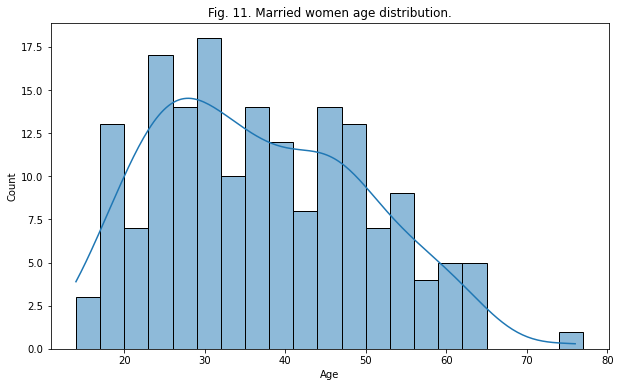

In [26]:
#Generate the 'married_women_data' table and record the relevant statistical info
married_women_data = X_all[X_all['Name'].str.split(",").str.get(1).str.contains('Mrs.')]
married_women_mean_age = married_women_data.Age.mean()
married_women_age_std = married_women_data.Age.std()
married_women_nan_count = married_women_data.Age.isnull().sum()

#Visualize the married women age distribution
plt.figure(figsize=(10,6))
sns.histplot(married_women_data, x='Age', kde=True, binwidth=3)
plt.title('Fig. 11. Married women age distribution.');

In [27]:
#Get indices of the 'NaN' age values for married women
married_women_age_nan_ind = X_all[(X_all['Name'].str.split(",").str.get(1).str.contains('Mrs.'))
                         & (X_all['Age'].isnull())].index

#Impute the married women 'NaN' age
X_all.loc[married_women_age_nan_ind,'Age'] = married_women_mean_age
print('Number of entries that are left with unknown age is:',
      len(X_all[X_all['Age'].isnull()]))
X_all.loc[married_women_age_nan_ind]

Number of entries that are left with unknown age is: 228


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
20,3,"Masselmani, Mrs. Fatima",female,36.804598,0,0,2649,7.2250,unknown,C,True
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.804598,1,0,PC 17569,146.5208,B78,C,True
141,3,"Boulos, Mrs. Joseph (Sultana)",female,36.804598,0,2,2678,15.2458,unknown,C,True
167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,36.804598,0,1,113505,55.0000,E33,S,True
187,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,36.804598,1,0,370365,15.5000,unknown,Q,True
257,1,"Thorne, Mrs. Gertrude Maybelle",female,36.804598,0,0,PC 17585,79.2000,unknown,C,True
335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,36.804598,1,0,PC 17611,133.6500,unknown,S,True
348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,36.804598,1,0,386525,16.1000,unknown,S,True
368,3,"Moussa, Mrs. (Mantoura Boulos)",female,36.804598,0,0,2626,7.2292,unknown,C,True


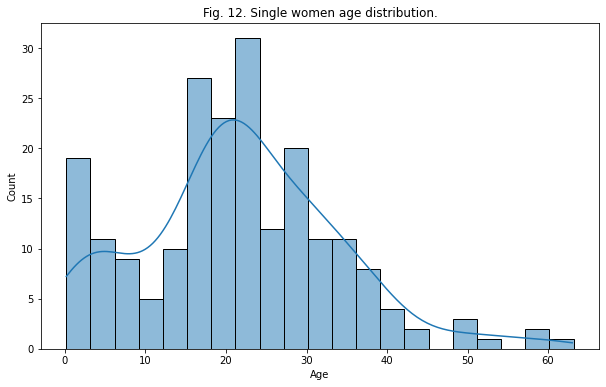

In [28]:
#Generate the 'single_women_data' table and record the relevant statistical info
single_women_data = X_all[X_all['Name'].str.split(",").str.get(1).str.contains('Miss.')]
single_women_mean_age = single_women_data.Age.mean()
single_women_age_std = single_women_data.Age.std()
single_women_nan_count = single_women_data.Age.isnull().sum()

#Visualize the age distribution of single women 
plt.figure(figsize=(10,6))
sns.histplot(single_women_data, x='Age', kde=True, binwidth=3)
plt.title('Fig. 12. Single women age distribution.');

In [29]:
#Get indices of 'NaN' age values for single women
single_women_age_nan_ind = X_all[(X_all['Name'].str.split(",").str.get(1).str.contains('Miss.'))
                         & (X_all['Age'].isnull())].index

#Impute the single women 'NaN' age
X_all.loc[single_women_age_nan_ind,'Age'] = single_women_mean_age
print('Number of entries that are left with unknown age is:',
      len(X_all[X_all['Age'].isnull()]))
X_all.loc[single_women_age_nan_ind]

Number of entries that are left with unknown age is: 178


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.774238,0,0,330959,7.8792,unknown,Q,True
33,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,unknown,Q,True
48,3,"O'Driscoll, Miss. Bridget",female,21.774238,0,0,14311,7.7500,unknown,Q,True
83,3,"McDermott, Miss. Brigdet Delia",female,21.774238,0,0,330932,7.7875,unknown,Q,True
110,3,"Moran, Miss. Bertha",female,21.774238,1,0,371110,24.1500,unknown,Q,True
129,3,"Peter, Miss. Anna",female,21.774238,1,1,2668,22.3583,F E69,C,True
181,3,"Sage, Miss. Constance Gladys",female,21.774238,8,2,CA. 2343,69.5500,unknown,S,True
199,3,"Madigan, Miss. Margaret ""Maggie""",female,21.774238,0,0,370370,7.7500,unknown,Q,True
230,3,"Lefebre, Miss. Mathilde",female,21.774238,3,1,4133,25.4667,unknown,S,True


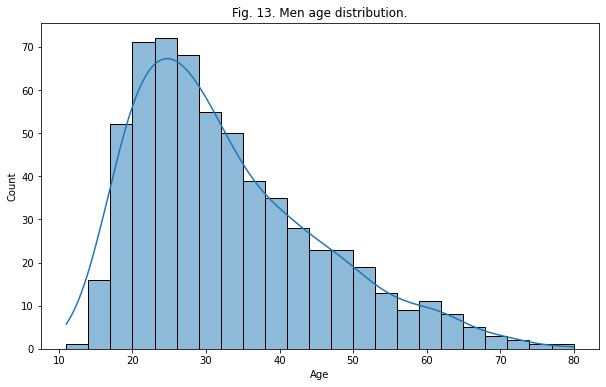

In [30]:
#Generate the 'men_data' table and record the relevant statistical info
men_data = X_all[(~(X_all['Name'].str.split(",").str.get(1).str.contains('Master.')))
                 & (X_all['Sex']=='male')]
men_mean_age = men_data.Age.mean()
men_age_std = men_data.Age.std()
men_nan_count = men_data.Age.isnull().sum()

#Visualize the age distribution of men 
plt.figure(figsize=(10,6))
sns.histplot(men_data, x='Age', kde=True, binwidth=3)
plt.title('Fig. 13. Men age distribution.');

In [31]:
#Get indices of the 'NaN' age values for men
men_age_nan_ind = X_all[(~(X_all['Name'].str.split(",").str.get(1).str.contains('Master.')))
                        & (X_all['Age'].isnull()) & (X_all['Sex']=='male')].index

#Impute the men 'NaN' age
X_all.loc[men_age_nan_ind,'Age'] = men_mean_age
print('Number of entries that are left with unknown age is:',
      len(X_all[X_all['Age'].isnull()]))
X_all.loc[men_age_nan_ind]

Number of entries that are left with unknown age is: 1


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
6,3,"Moran, Mr. James",male,32.784298,0,0,330877,8.4583,unknown,Q,True
18,2,"Williams, Mr. Charles Eugene",male,32.784298,0,0,244373,13.0000,unknown,S,True
27,3,"Emir, Mr. Farred Chehab",male,32.784298,0,0,2631,7.2250,unknown,C,True
30,3,"Todoroff, Mr. Lalio",male,32.784298,0,0,349216,7.8958,unknown,S,True
37,3,"Mamee, Mr. Hanna",male,32.784298,0,0,2677,7.2292,unknown,C,True
...,...,...,...,...,...,...,...,...,...,...,...
1258,3,"Caram, Mr. Joseph",male,32.784298,1,0,2689,14.4583,unknown,C,True
1272,3,"O'Connor, Mr. Patrick",male,32.784298,0,0,366713,7.7500,unknown,Q,True
1276,2,"Wheeler, Mr. Edwin Frederick""""",male,32.784298,0,0,SC/PARIS 2159,12.8750,unknown,S,True


One 'unconventional' missing entry in the 'Age' column still needs to be fixed. As it can be seen from the table below, the corresponding passenger's title is 'Ms.'. Therefore, we will impute this entry with the mean women's age. 

In [32]:
X_all[X_all.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,unknown,Q,True


In [33]:
#Generate the 'women_data' table and record the relevant statistical info
women_data = X_all[X_all['Sex']=='female']
women_mean_age = women_data.Age.mean()

#Replace the 'Nan' age entry with the mean women's age
X_all.loc[980, 'Age'] = women_mean_age
X_all.loc[980, :]

Pclass                                   3
Name               O'Donoghue, Ms. Bridget
Sex                                 female
Age                                28.4151
SibSp                                    0
Parch                                    0
Ticket                              364856
Fare                                  7.75
Cabin                              unknown
Embarked                                 Q
Age_was_missing                       True
Name: 980, dtype: object

Yahoo, we have finally imputed all the 'NaN' entries in the 'Age' column!!! The only entry to be fixed now is a single 'NaN' value in the 'Fare' column, which is coming from the testing dataset.

## <a id='Link-SecImp-Fare'>Fare feature</a>

Let's fix the only 'NaN' value in the 'Fare' column right away, taking into account that the corresponding passenger had a 3rd class ticket and embarked in (S)outhampton.

In [34]:
X_all[X_all.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,unknown,S,False


In [35]:
#Create a list of 3rd class passengers embarked in 'S'
fare_imputation_data = X_all[(X_all.Pclass==3)&(X_all.Embarked=='S')]

#Impute the 'NaN' fare with the median fare value
X_all.loc[1044, 'Fare'] = fare_imputation_data.Fare.median()
X_all.isnull().sum()

Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Age_was_missing    0
dtype: int64

Perfect!!! As seen above, _all the missing values are now imputed and a new feature is generated._ To fully complete the preprocessing stage, we will drop the 'Name' and 'Ticket' features from our imputed dataset and split it back into the training and testing datasets.

In [36]:
#Fully imputed train data
X_train_imputed = X_all.iloc[:891].drop(['Name','Ticket'], axis = 1)
X_train_imputed

#Fully imputed test data
X_test_imputed = X_all.iloc[891:].drop(['Name', 'Ticket'], axis = 1)
X_test_imputed

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_was_missing
PassengerId,,,,,,,,,
892,3,male,34.500000,0,0,7.8292,unknown,Q,False
893,3,female,47.000000,1,0,7.0000,unknown,S,False
894,2,male,62.000000,0,0,9.6875,unknown,Q,False
895,3,male,27.000000,0,0,8.6625,unknown,S,False
896,3,female,22.000000,1,1,12.2875,unknown,S,False
...,...,...,...,...,...,...,...,...,...
1305,3,male,32.784298,0,0,8.0500,unknown,S,True
1306,1,female,39.000000,0,0,108.9000,C105,C,False
1307,3,male,38.500000,0,0,7.2500,unknown,S,False


# <a id='Link-SecModel'>Model training, selection, and predictions</a>

## <a id='Link-SecModel-DataPrepr'>Data preprocessing</a>

Before we train our model and make predictions, we will first preprocess our categorical and numerical columns using the ColumnTransformer class of the `sklearn.compose` module and prepare the data for fitting a machine learning model. (Check out [this turotial](https://www.kaggle.com/alexisbcook/pipelines) to learn more about keeping your data preprocessing and modeling code organized) 

In [37]:
#Load required packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Create lists of numerical and categorical columns
num_cols = [c for c in X_train_imputed.columns 
            if X_train_imputed[c].dtype in ['int64','float64']]
cat_cols = [c for c in X_train_imputed.columns if 
            X_train_imputed[c].dtype in ['object','bool']]

#Categorical and numerical columns transformation pipelines
cat_transformer_onehot = Pipeline(steps=[
    ('onehot_transf', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer([
    ('categoricals', cat_transformer_onehot, cat_cols),
    ('numericals', num_transformer, num_cols)],
    remainder = 'passthrough')

## <a id='Link-SecModel-Training'>Model training</a>

In this subsection, we will fit different machine learning algorithms with our preprocessed data and choose the optimal parameters for each model. We will consider the following models:
* Random forest classifier
* Gradient boost classifier
* Logistic regression classifier
* K-nearest neighbors classifier

### <a id='Link-SecModel-Training-RFC'>Random forest classifier</a>

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_RFC = RandomForestClassifier()

#Bundle preprocessing and modeling code in a pipeline
my_pipeline_RFC = Pipeline(steps=[('preprocessor', preprocessor), 
                                  ('RFC_model', model_RFC)])

#Hyperparameter tuning implementation
param_grid_RFC = {
    'RFC_model__n_estimators': [100, 235, 300], 
    'RFC_model__max_depth': [10, 30, 100], 
    'RFC_model__min_samples_split': [5, 15, 25],
    'RFC_model__random_state': [10],
}

searchCV_RFC = GridSearchCV(my_pipeline_RFC, 
                            param_grid=param_grid_RFC,
                            cv=5, scoring='accuracy',n_jobs=-1)

searchCV_RFC.fit(X_train_imputed, y_train)
print('Best parameters for the Random Forest Classifier: \n',
      searchCV_RFC.best_params_) 
print('Best accuracy score for the Random Forest Classifier: ',
      searchCV_RFC.best_score_)

Best parameters for the Random Forest Classifier: 
 {'RFC_model__max_depth': 30, 'RFC_model__min_samples_split': 15, 'RFC_model__n_estimators': 235, 'RFC_model__random_state': 10}
Best accuracy score for the Random Forest Classifier:  0.8361308141359614


### <a id='Link-SecModel-Training-XGBC'>Gradient boosting classifier</a>

In [39]:
from xgboost import XGBClassifier

model_XGBC = XGBClassifier()

#Bundle preprocessing and modeling code in a pipeline
my_pipeline_XGBC = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('XGBC_model', model_XGBC)])

#Hyperparameter tuning implementation 
#To speed up this block, non-optimal parameters are commented out
param_grid_XGBC = {
    'XGBC_model__eval_metric': ['error'],
    'XGBC_model__objective': ['binary:logistic'],
    'XGBC_model__n_estimators': [50, 100, 150],
    'XGBC_model__learning_rate': [0.1, 0.3], 
    'XGBC_model__max_depth': [6, 9], 
    'XGBC_model__min_child_weight': [2],
    'XGBC_model__reg_alpha': [0.3, 1, 3], 
    'XGBC_model__reg_lambda': [0.01, 0.03, 0.1],  
    'XGBC_model__random_state': [10],
}

searchCV_XGBC = GridSearchCV(my_pipeline_XGBC, param_grid=param_grid_XGBC,
                             cv=5, scoring='accuracy',n_jobs=-1)

searchCV_XGBC.fit(X_train_imputed, y_train)
print('Best parameters for the XGBoost Classifier: \n',
      searchCV_XGBC.best_params_) 
print('Best accuracy score for the XGBoost Classifier: ', 
      searchCV_XGBC.best_score_)

C:\Users\alexk\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best parameters for the XGBoost Classifier: 
 {'XGBC_model__eval_metric': 'error', 'XGBC_model__learning_rate': 0.1, 'XGBC_model__max_depth': 6, 'XGBC_model__min_child_weight': 2, 'XGBC_model__n_estimators': 150, 'XGBC_model__objective': 'binary:logistic', 'XGBC_model__random_state': 10, 'XGBC_model__reg_alpha': 1, 'XGBC_model__reg_lambda': 0.1}
Best accuracy score for the XGBoost Classifier:  0.8417425145941874


### <a id='Link-SecModel-Training-LRC'> Logistic regression classifier</a>

In [40]:
from sklearn.linear_model import LogisticRegression

model_LRC = LogisticRegression()

#Bundle preprocessing and modeling code in a pipeline
my_pipeline_LRC = Pipeline(steps=[('preprocessor', preprocessor), 
                                  ('LRC_model', model_LRC)])

#Hyperparameter tuning implementation
param_grid_LRC = {
    'LRC_model__max_iter': [10, 50, 200, 1000],
    'LRC_model__penalty': ['l1', 'l2'], 
    'LRC_model__C': [0.03, 0.1, 0.3, 1, 3, 10, 30], 
    'LRC_model__solver': ['liblinear'],
    'LRC_model__random_state': [10],
}

searchCV_LRC = GridSearchCV(my_pipeline_LRC, param_grid=param_grid_LRC,
                            cv=5, scoring='accuracy',n_jobs=-1)

searchCV_LRC.fit(X_train_imputed, y_train)
print('Best parameters for the LogisticRegression Classifier: \n',
      searchCV_LRC.best_params_) 
print('Best accuracy score for the LogisticRegression Classifier: ', 
      searchCV_LRC.best_score_)

Best parameters for the LogisticRegression Classifier: 
 {'LRC_model__C': 1, 'LRC_model__max_iter': 10, 'LRC_model__penalty': 'l2', 'LRC_model__random_state': 10, 'LRC_model__solver': 'liblinear'}
Best accuracy score for the LogisticRegression Classifier:  0.7991023790094783


### <a id='Link-SecModel-Training-KNNC'> k-nearest neighbors classifier</a>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_KNNC = KNeighborsClassifier()

#Bundle preprocessing and modeling code in a pipeline
my_pipeline_KNNC = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('KNNC_model', model_KNNC)])

#Hyperparameter tuning implementation
param_grid_KNNC = {
    'KNNC_model__n_neighbors': [3, 5, 7, 9, 11], 
    'KNNC_model__weights': ['uniform', 'distance'], 
    'KNNC_model__leaf_size': [1, 3, 10, 30],
    'KNNC_model__p': [1, 2],
}

searchCV_KNNC = GridSearchCV(my_pipeline_KNNC, param_grid=param_grid_KNNC,
                             cv=5, scoring='accuracy',n_jobs=-1)

searchCV_KNNC.fit(X_train_imputed, y_train)
print('Best parameters for kNN Classifier: \n',searchCV_KNNC.best_params_) 
print('Best accuracy score for kNN Classifier: ', searchCV_KNNC.best_score_)

Best parameters for kNN Classifier: 
 {'KNNC_model__leaf_size': 1, 'KNNC_model__n_neighbors': 9, 'KNNC_model__p': 1, 'KNNC_model__weights': 'uniform'}
Best accuracy score for kNN Classifier:  0.8204318624066286


## <a id='Link-SecModel-Selection'>Model selection and predictions</a>

Below, we provide a table that summarizes the Accuracy and F1 score predictions of 4 different models, after testing these models on cross validation dataset.

| Model  | Accuracy | F1 score |
| --- | --- | -- |
| Random forest classifier | 0.836 | 0.765 |
| Gradient boosting classifier | 0.842 | 0.781 |
| Logistic regression classifier | 0.800 | 0.733 |
| kNN classifier | 0.820 | 0.749 |


The XGBoost classifier provides the best accuracy on the cross validation data, so one can use this model to make predictions on the test dataset. 

In [42]:
#Generate predictions
my_pipeline_final = searchCV_XGBC.best_estimator_
predictions = my_pipeline_final.predict(X_test_imputed)

#Generate output
output = pd.DataFrame({'PassengerId': X_test_imputed.index, 
                       'Survived': predictions})
output.to_csv('predictions.csv', index=False)

Check out a copy of this notebook on [Kaggle](https://www.kaggle.com/alexkoshchii/top-7-titanic-dataset-notebook), which was prepared for a submission to the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) competition.